# Refinement

**Introduction:**
Using the data gathered from Taarifa and the Tanzanian Ministry of Water, can we predict which pumps are functional, which need some repairs, and which don't work at all? Predicting one of these three classes based and a smart understanding of which waterpoints will fail, can improve the maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

This is also an intermediate-level competition by [DataDriven][1]! All code & support scripts are in [Github Repo][2]

[1]: https://www.drivendata.org/competitions/7/ "Link to Competetion Page"
[2]: https://github.com/msampathkumar/datadriven_pumpit "User Code"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.model_selection import cross_val_score

from scripts.tools import df_check_stats, game, sam_pickle_save, sam_pickle_load

np.set_printoptions(precision=5)
np.random.seed(69572)
plt.style.use('ggplot')
sns.set(color_codes=True)

%matplotlib inline

In [2]:
crazy_list = dir()

In [3]:
for each in dir():
    if each not in crazy_list:
        del each

print('Length of dir():', len(dir()))

Length of dir(): 43


## Algorithmn ReSelection

Inspired by the [Classifier comparision from SciKit Example](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html), we are trying to see which algorithm work better.

Due to heavyness of data, we are avoiding checking Linear, RBF, SVM

In [31]:
X, y, TEST_X = sam_pickle_load(prefix="tmp/Iteration2_final_")
df_check_stats(X, y, TEST_X)

LOAD PREFIX USED:  tmp/Iteration2_final_
Data Frame Shape: (59400, 43) TotColumns: 43 ObjectCols: 0
Numpy Array Size: 59400
Data Frame Shape: (14850, 43) TotColumns: 43 ObjectCols: 0


In [32]:
clf = RandomForestClassifier(random_state=192)

scores = cross_val_score(clf, X, y, cv=5, n_jobs=-1)

print('AC Score:', scores.mean())

AC Score: 0.798063835306


In [33]:
# preprocess dataset, split into training and test part
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=.25, random_state=42)

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors",
#          "Linear SVM",
#          "RBF SVM",
#          "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "GBT",]

classifiers = [
    KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier()]

# iterate over classifiers
te_scores = []
tr_scores = []

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    tr_scores.append(clf.score(X_train, y_train))
    te_scores.append(clf.score(X_test, y_test))

/Users/sampathm/miniconda3/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


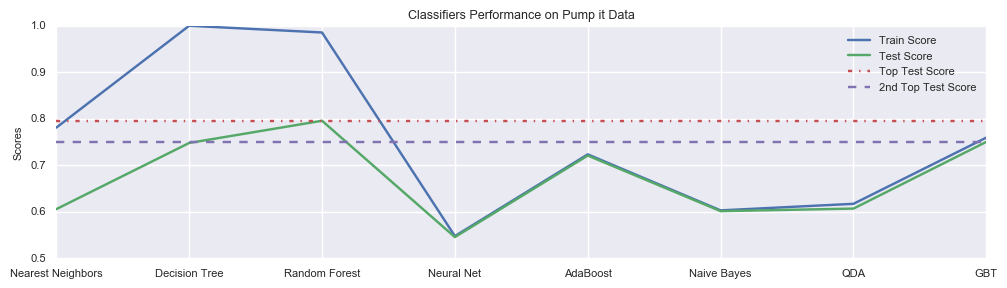

In [169]:
plt.figure(figsize=(12, 3))
plt.plot(range(len(names)), tr_scores)
plt.plot(range(len(names)), te_scores)
plt.xticks(range(len(names)), names, fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('Scores', fontsize=8)
# plt.xlabel('Alog', fontsize=8)

plt.title('Classifiers Performance on Pump it Data', fontsize=9)

lines_scores = te_scores.copy()
lines_scores.sort()

plt.plot((0, len(tr_scores) -1 ), (lines_scores[-1], lines_scores[-1]), '-.')
plt.plot((0, len(tr_scores) -1 ), (lines_scores[-2], lines_scores[-2]), '--')


plt.legend(['Train Score',
            'Test Score',
            'Top Test Score',
            '2nd Top Test Score'], fontsize=8)

__Conclusion:__

As we can see from above plots, we can say that KNN, Decision Trees and Random Forest(0.7956) suffer from overfitting/bias based on their differences in test-train scores(points). So, we are discarding from these classifiers.

Due to size limitation of data & heavy computations, we did not try SVM model and Gaussian Models. So, not considered for Algorthmns selection.

For Neural Net, AdaBoost, Naive Bayes, QuadraticDiscriminantAnalysis and GBT, in these models seem to form a generic classifier with minimal differences in their test train scores(points). So, Algorithm with top performers from these are __GBT(0.7502)__ and AdaBoost.

Although we have initial benchmark based on Random Forest, as we see here it was due to overfitting/bias. So we will continue futher improvement with __GBT__.